In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
df=pd.read_csv("Smartphone_data_train.csv")
test=pd.read_csv("Smartphone_data_test.csv")

In [4]:
df.shape

(7352, 563)

In [5]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [8]:
df.subject.value_counts().index

Int64Index([25, 21, 26, 30, 28, 27, 23, 17, 16, 19, 1, 29, 3, 15, 6, 14, 22,
            11, 7, 5, 8],
           dtype='int64')

### Data Preprocessing

In [9]:
df.isna().values.sum()

0

In [10]:
sum(df.duplicated())

0

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'LAYING'),
  Text(1, 0, 'STANDING'),
  Text(2, 0, 'SITTING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_UPSTAIRS'),
  Text(5, 0, 'WALKING_DOWNSTAIRS')])

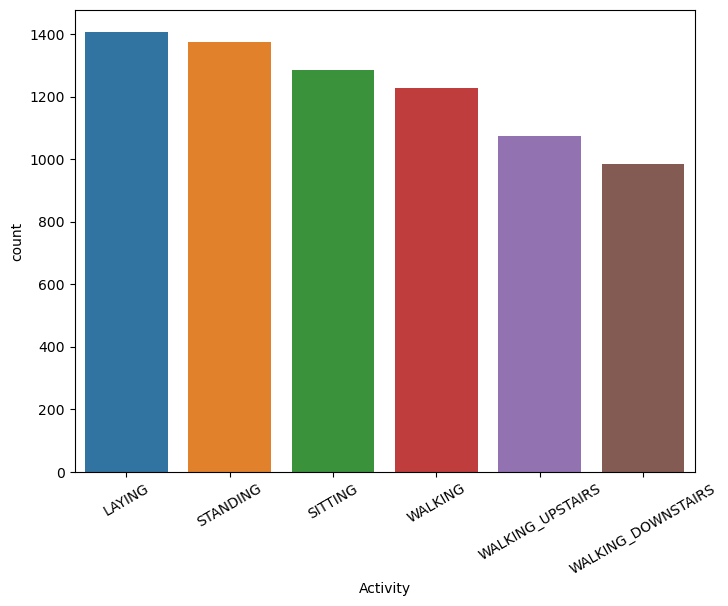

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(x=df.Activity , order=df.Activity.value_counts().index )
plt.xticks(rotation=30)

### EDA

In [16]:
Counter([col.split('-')[0].split('(')[0] for col in df.columns] )

Counter({'tBodyAcc': 40,
         'tGravityAcc': 40,
         'tBodyAccJerk': 40,
         'tBodyGyro': 40,
         'tBodyGyroJerk': 40,
         'tBodyAccMag': 13,
         'tGravityAccMag': 13,
         'tBodyAccJerkMag': 13,
         'tBodyGyroMag': 13,
         'tBodyGyroJerkMag': 13,
         'fBodyAcc': 79,
         'fBodyAccJerk': 79,
         'fBodyGyro': 79,
         'fBodyAccMag': 13,
         'fBodyBodyAccJerkMag': 13,
         'fBodyBodyGyroMag': 13,
         'fBodyBodyGyroJerkMag': 13,
         'angle': 7,
         'subject': 1,
         'Activity': 1})

In [17]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in df.columns]),orient="index" ).rename(columns={0:'count'}).sort_values('count',ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


Text(-0.99, 8, 'Static Activities')

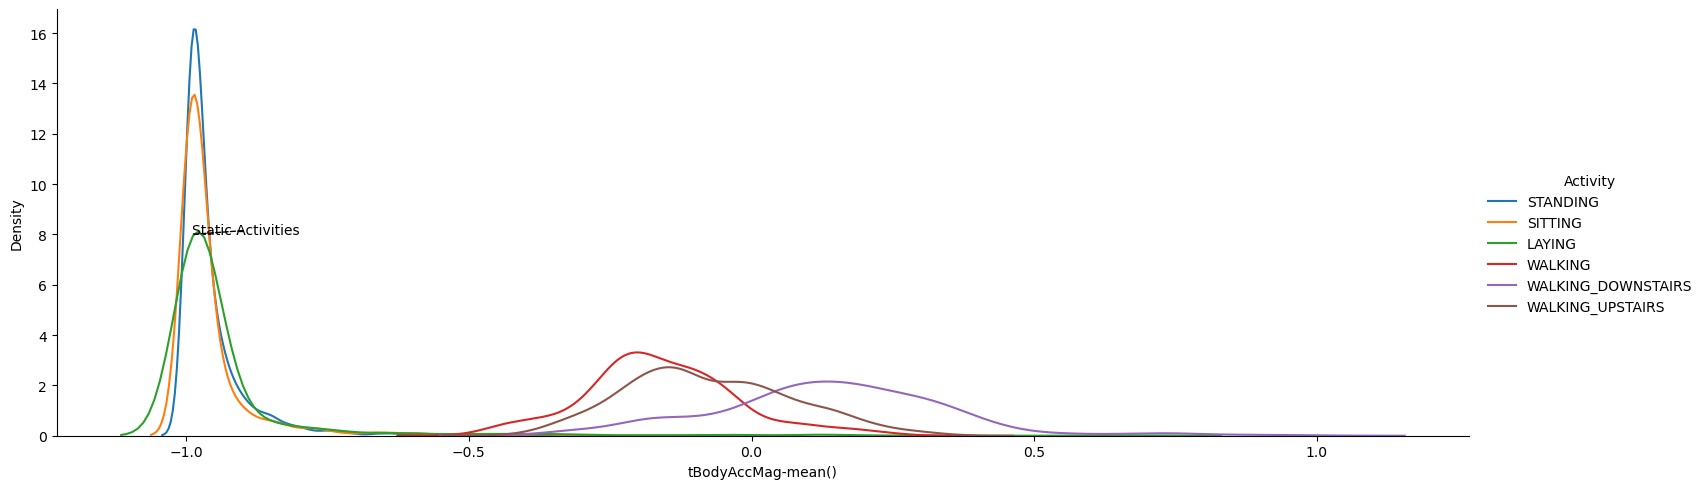

In [20]:
facetgrid=sns.FacetGrid(df, hue='Activity',height=5,aspect=3)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False).add_legend()

plt.annotate("Static Activities",xy=(-.99,8),arrowprops={'arrowstyle':'-' ,'ls':'dashed'})

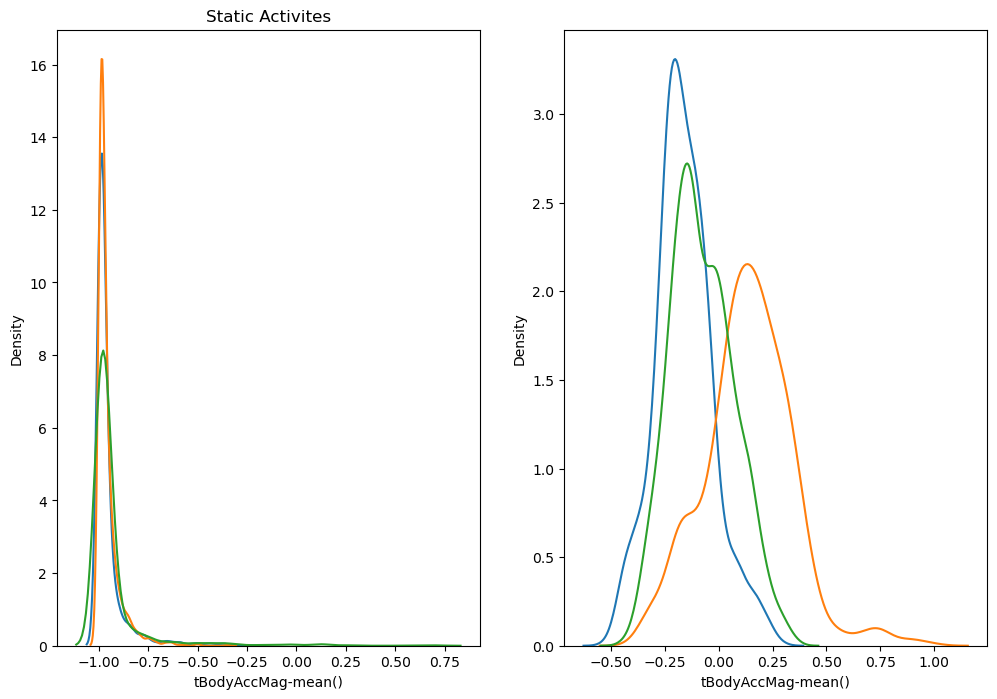

In [21]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('Static Activites')
sns.distplot(df[df['Activity']=='SITTING']['tBodyAccMag-mean()'], hist=False,label='Sitting')
sns.distplot(df[df['Activity']=='STANDING']['tBodyAccMag-mean()'], hist=False,label='Standing')
sns.distplot(df[df['Activity']=='LAYING']['tBodyAccMag-mean()'], hist=False,label='Laying')

plt.subplot(1,2,2)
sns.distplot(df[df['Activity']=='WALKING']['tBodyAccMag-mean()'], hist=False,label='Walking')
sns.distplot(df[df['Activity']=='WALKING_DOWNSTAIRS']['tBodyAccMag-mean()'], hist=False,label='Walking_Downstairs')
sns.distplot(df[df['Activity']=='WALKING_UPSTAIRS']['tBodyAccMag-mean()'], hist=False,label='Walking_Upstairs')
plt.show()


#### Analysing Body acceelration vs different activitites .

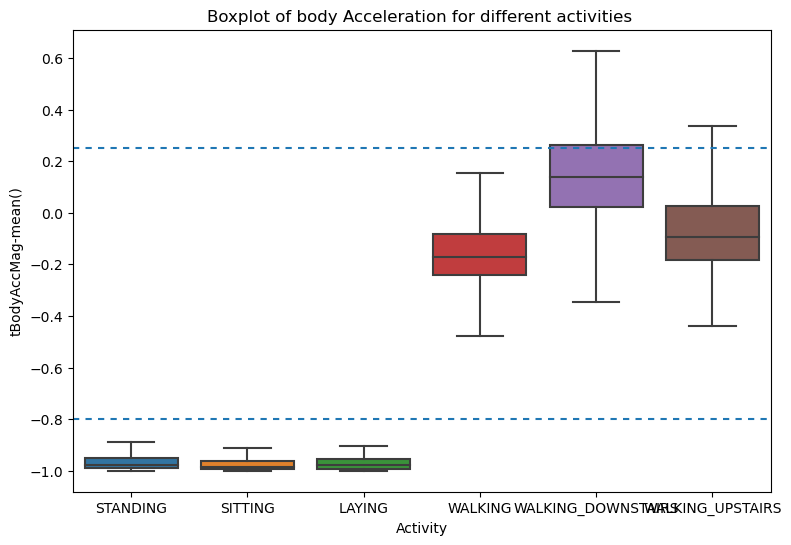

In [149]:
plt.figure(figsize=(9,6))
sns.boxplot(x="Activity",y='tBodyAccMag-mean()',data=df,showfliers=False)
plt.title("Boxplot of body Acceleration for different activities ")
plt.axhline(y=-0.8, dashes=(3,3))
plt.axhline(y=0.25, dashes=(3,3))
plt.show()

#### Analysing X axis relationship with gravity mean Feature. 

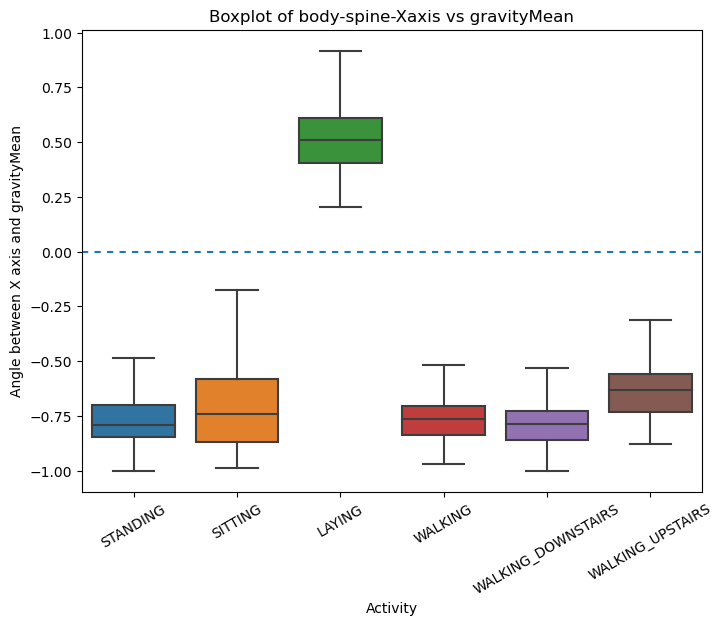

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Activity",y='angle(X,gravityMean)',data=df,showfliers=False)
plt.ylabel("Angle between X axis and gravityMean")
plt.title("Boxplot of body-spine-Xaxis vs gravityMean")
plt.axhline(y=0, dashes=(3,3))
plt.xticks(rotation=30)
plt.show() 

#### Analysing Y axis relationship with gravity mean Feature. 

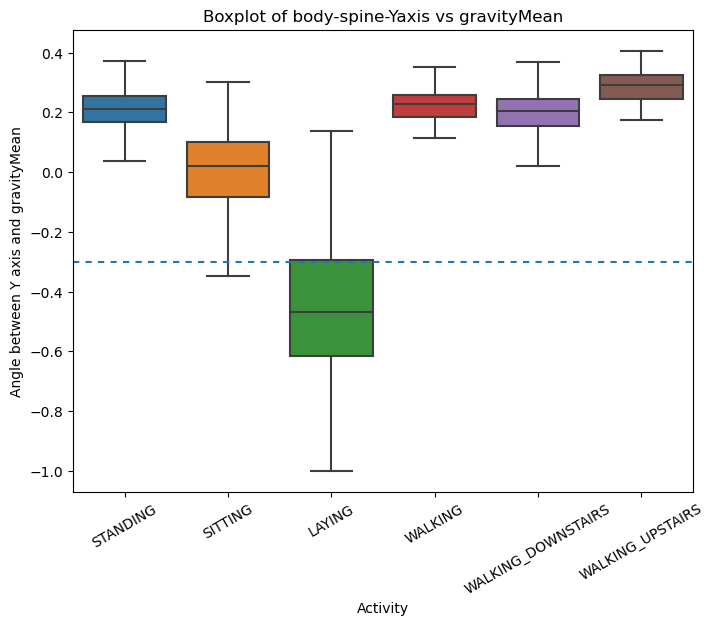

In [165]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Activity",y='angle(Y,gravityMean)',data=df,showfliers=False)
plt.ylabel("Angle between Y axis and gravityMean")
plt.title("Boxplot of body-spine-Yaxis vs gravityMean")
plt.axhline(y=-0.3, dashes=(3,3))
plt.xticks(rotation=30)
plt.show() 

#### Using PCA to reduce dimensions

In [167]:
x_pca=df.drop(['Activity','subject'],axis=1)

In [168]:
pca=PCA(n_components=2 , random_state=0 ).fit_transform(x_pca)

In [169]:
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

<Axes: >

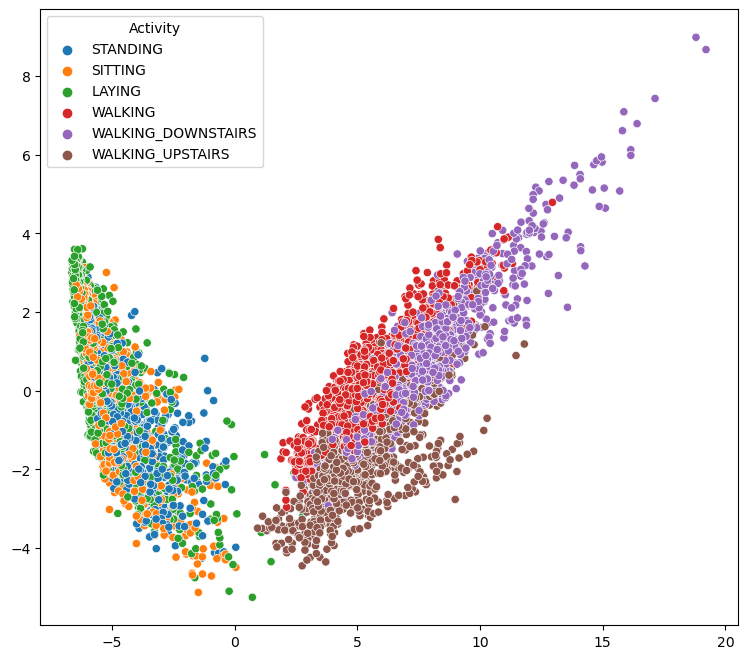

In [172]:
plt.figure(figsize=(9,8))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=df['Activity'])

#### Using TSNE

In [178]:
x_tsne=df.drop(['subject','Activity'],axis=1)
tsne=TSNE(n_components=2 , random_state=0).fit_transform(x_tsne)

In [179]:
tsne

array([[ -6.9932804, -63.188377 ],
       [-25.07103  , -17.728373 ],
       [-27.199108 , -20.449244 ],
       ...,
       [ 23.136957 , -60.145756 ],
       [ 23.117773 , -59.890156 ],
       [ 23.605974 , -59.11817  ]], dtype=float32)

<Axes: >

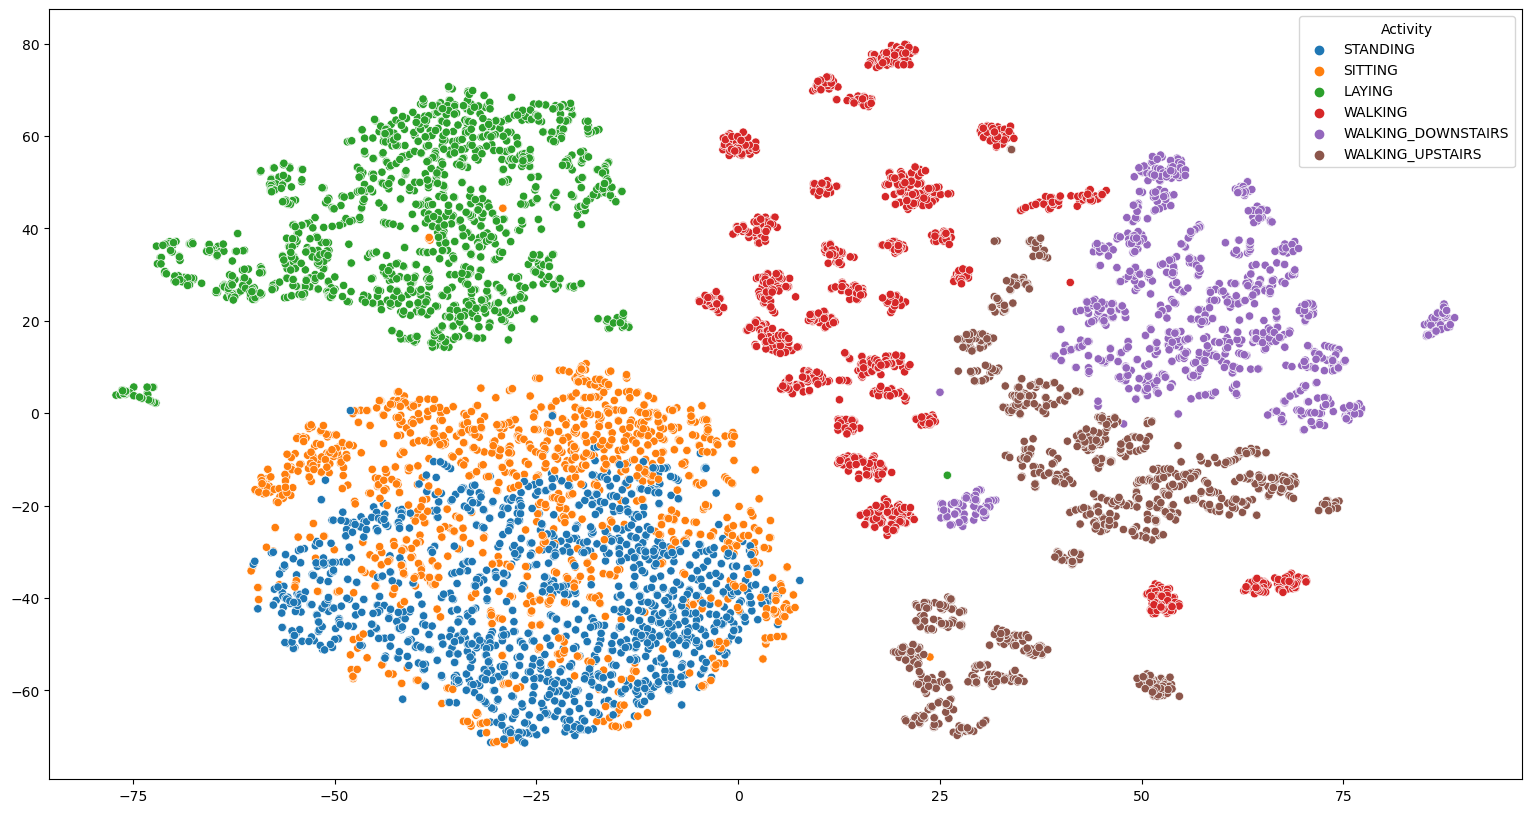

In [184]:
plt.figure(figsize=(19,10))
sns.scatterplot(x=tsne[:,0],y=tsne[:,1],hue=df['Activity'])

### ML Models

In [198]:
xtrain=df.drop(['subject','Activity'],axis=1)
ytrain=df.Activity

xtest=test.drop(['subject','Activity'],axis=1)
ytest=test['Activity']

In [195]:
print('Training data size :',xtrain.shape)
print('Testing data size :', xtest.shape)

Training data size : (7352, 561)
Testing data size : (999, 561)


#### <font color='red'> Logistic Regression model with Hyperparameter tuning and cross validation</font>

In [196]:
lr=LogisticRegression()

In [199]:
parameters={'max_iter':[100,200,500]}
lr_classifier_rs=RandomizedSearchCV(lr,param_distributions=parameters , cv=5,random_state=40)
lr_classifier_rs.fit(xtrain,ytrain)
y_pred_lr=lr_classifier_rs.predict(xtest)

#### Accuracy

In [208]:
lr_accuracy=accuracy_score(ytest,y_pred_lr)
print("Accuracy using Logistic Regression " , round(lr_accuracy*100,3))

Accuracy using Logistic Regression  95.495


#### Confusion Matrix

In [222]:
cm=confusion_matrix(ytest ,y_pred_lr)

In [223]:
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 146,  21,   0,   0,   3],
       [  0,   8, 170,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  13,   0, 136]], dtype=int64)

Text(0.5, 1.0, ' Confusion matrix for Logistic Regression ')

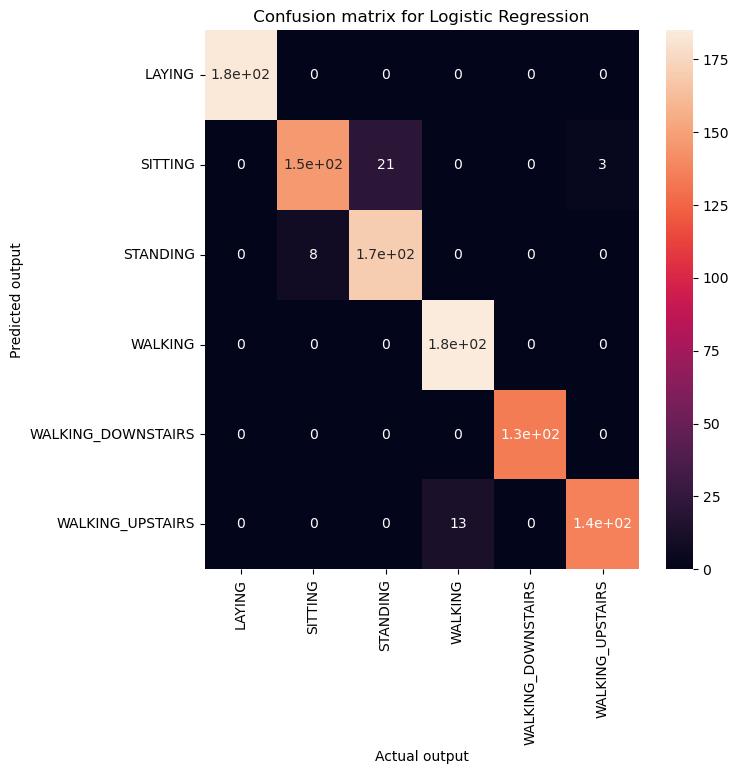

In [254]:
labels=np.unique(y_pred_lr)
plt.figure(figsize=(7,7))
sns.heatmap(cm ,annot=True , xticklabels=labels, yticklabels=labels)
plt.ylabel('Predicted output')
plt.xlabel('Actual output')
plt.title(" Confusion matrix for Logistic Regression ")


In [261]:
print("Best parameter :" , lr_classifier_rs.best_params_)

Best parameter : {'max_iter': 200}


#### <font color ="red" >Kernel SVM model with Hyperparameter tuning and cross validation</font>

In [266]:
parameters={'kernel':['linear','rbf','poly','sigmoid'],
           'C':[100,50]}
svm_rs=RandomizedSearchCV( SVC() ,param_distributions=parameters , cv=3 ,random_state=42)
svm_rs.fit(xtrain , ytrain)



RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [267]:
ypred_svm = svm_rs.predict(xtest)

#### Accuracy

In [330]:
svm_rs = accuracy_score(ytest,ypred_svm)
print("Accuracy using kernel svm " , round(svm_rs*100,6))

Accuracy using kernel svm  96.596597


Text(0.5, 1.0, ' Confusion matrix for SVM  ')

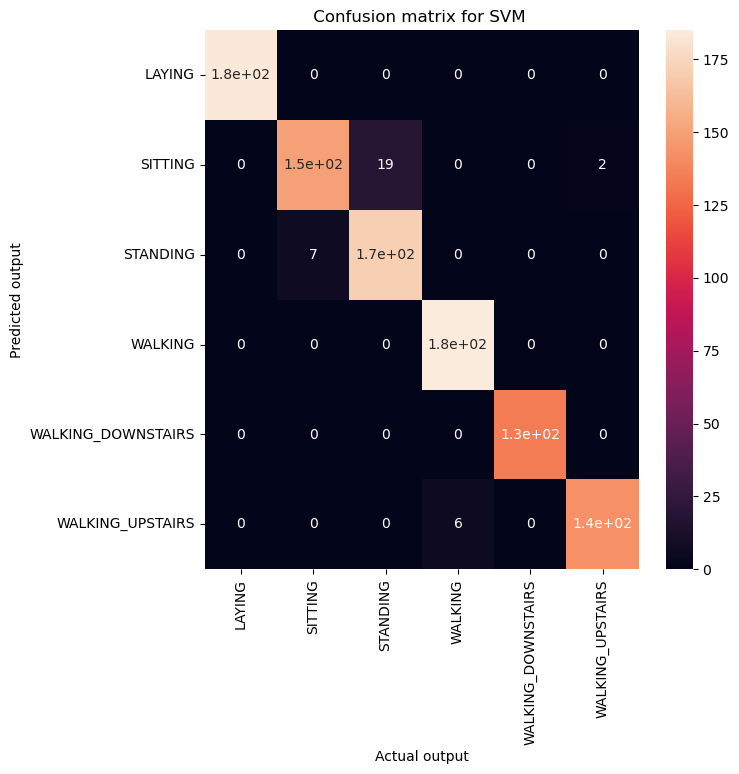

In [286]:
cm=confusion_matrix(ytest ,ypred_svm)

labels=np.unique(y_pred_lr)
plt.figure(figsize=(7,7))
sns.heatmap(cm ,annot=True , xticklabels=labels, yticklabels=labels)
plt.ylabel('Predicted output')
plt.xlabel('Actual output')
plt.title(" Confusion matrix for SVM  ")

### <font color='red ' > Decision tree model with Hyperparameter tuning and cross validation </font>

In [319]:
parameters={'max_depth': np.arange(2,10,2)}

dt=DecisionTreeClassifier()
dt_rs=RandomizedSearchCV(dt , param_distributions =parameters , random_state=42)
dt_rs.fit(xtrain , ytrain)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8])},
                   random_state=42)

In [321]:
ypred_dt = dt_rs.predict(xtest)

In [322]:
print("Accuracy of D TREE Model : " , accuracy_score(ytest ,ypred_dt))

Accuracy of D TREE Model :  0.8348348348348348


Text(0.5, 1.0, ' Confusion matrix for Decision Tree model ')

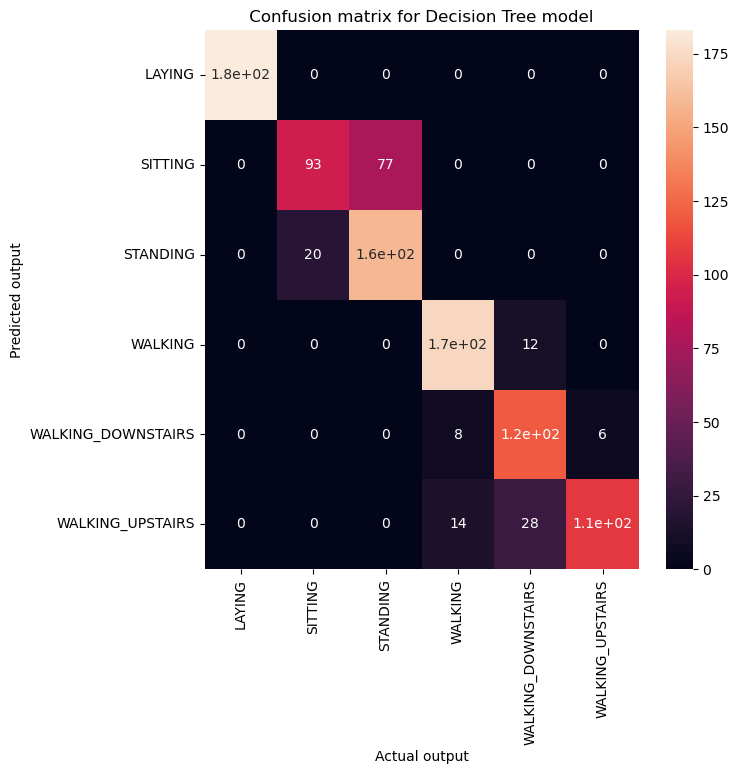

In [323]:
cm1 =confusion_matrix(ytest ,ypred_dt)

labels=np.unique(y_pred_lr)
plt.figure(figsize=(7,7))
sns.heatmap(cm1 ,annot=True , xticklabels=labels, yticklabels=labels)
plt.ylabel('Predicted output')
plt.xlabel('Actual output')
plt.title(" Confusion matrix for Decision Tree model ")

In [324]:
cm1

array([[183,   0,   0,   0,   0,   0],
       [  0,  93,  77,   0,   0,   0],
       [  0,  20, 158,   0,   0,   0],
       [  0,   0,   0, 173,  12,   0],
       [  0,   0,   0,   8, 120,   6],
       [  0,   0,   0,  14,  28, 107]], dtype=int64)

#### <font color ="red" > RandomForestClassifier model with Hyperparameter tuning and cross validation </font>

In [326]:
parameters={ 'n_estimators' : np.arange(20,101,10) , 'max_depth': np.arange(2,17,2) }
rf = RandomForestClassifier()
rf_rs=RandomizedSearchCV( rf , param_distributions =parameters  , random_state=42)
rf_rs.fit(xtrain , ytrain)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [327]:
ypred_rf = rf_rs.predict(xtest)

In [328]:
print("Accuracy of Random Forest Model : " , accuracy_score(ytest ,ypred_rf ))


Accuracy of Random Forest Model :  0.8958958958958959


Text(0.5, 1.0, ' Confusion matrix for Random Forest model ')

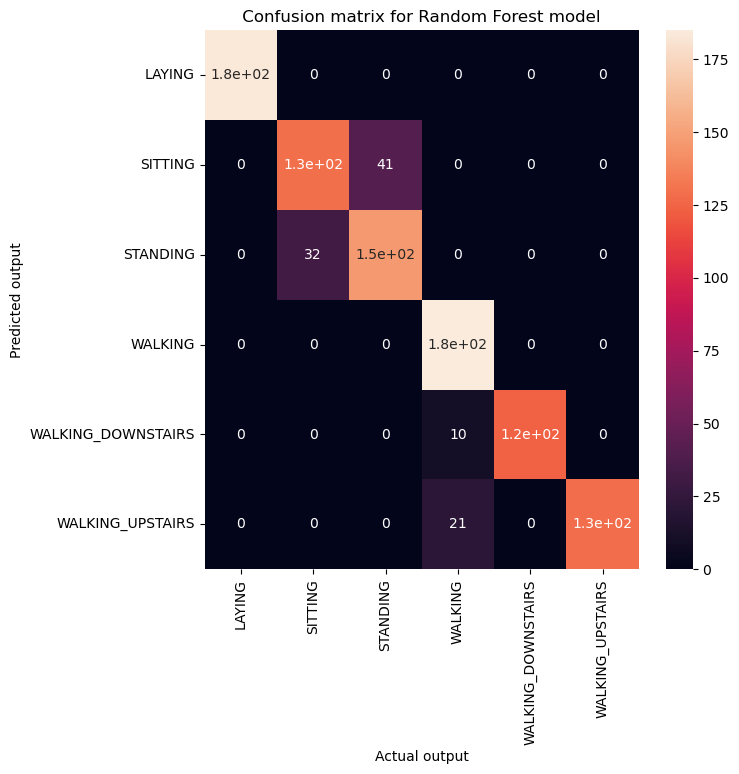

In [329]:
cm=confusion_matrix(ytest ,ypred_rf)

labels=np.unique(y_pred_lr)
plt.figure(figsize=(7,7))
sns.heatmap(cm ,annot=True , xticklabels=labels, yticklabels=labels)
plt.ylabel('Predicted output')
plt.xlabel('Actual output')
plt.title(" Confusion matrix for Random Forest model ")


### Conclusion : Highest accurate model is SVM with accuracy 96 % (approx)

### project complete